In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from datetime import date, datetime

In [4]:
#Preview file
csv_path = "uber-rides-dataset.csv"

# Create dataframe
uber_df = pd.read_csv(csv_path)
uber_df.head()

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"September 13, 2015 at 6:54PM",Completed,Uber,cd2550e2ffb0ddd9b928bb45610e64cd,c02023222f4083ee5a28280a8ce65b11,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9/13/15 15:06,9/13/15 17:54,0:29:37,...,17.77,2015-09-13T15:06:00,14,14,0.58,5.70,0,clear-day,Clear,rain
1,"September 9, 2015 at 5:00PM",Completed,Uber,54b6a258d6d5cdec9d6e4dd39236af4c,6035b1f913676b3e615126e187be34f2,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9/9/15 13:25,9/9/15 16:00,0:23:40,...,8.01,2015-09-09T13:25:00,16,16,0.92,3.34,0.75,partly-cloudy-day,Mostly Cloudy,rain
2,"September 23, 2015 at 12:06AM",Completed,Uber,3eca478c9a479278d2a19ba87069fe0c,a6e8b5316af29c021ff127284d487307,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9/22/15 21:39,9/22/15 23:06,0:18:32,...,6.20,2015-09-22T21:39:00,8,8,0.89,0.54,0,clear-night,Clear,rain
3,"June 14, 2015 at 7:44AM",Cancelled,Uber,b970e99cf7d4e163c9808ed945f9e5be,a89bc69e8452fcec3f650b688f6e3473,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,6/14/15 5:58,6/14/15 6:44,0:01:00,...,0.10,2015-06-14T05:58:00,17,17,0.69,0.88,0.32,partly-cloudy-day,Partly Cloudy,none
4,"November 26, 2017 at 08:59PM",Completed,Uber,c958b6b3f36ff994821c59fe6327cb15,1d2a87b0080f9ccc87296da2f2c58ca2,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11/26/17 19:01,11/26/17 19:59,0:18:37,...,13.99,2017-11-26T19:01:00,2,-1,0.90,3.49,1,cloudy,Overcast,none


In [5]:
# Preview the columns with the data we can exploit
uber_df.columns

Index(['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid',
       'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation'],
      dtype='object')

# DRIVER GENDER 'driver_gender'

In [145]:
# Calculate the number of male and female drivers
gender_count = uber_df["driver_gender"].value_counts()

# Calculate the percentage of male and female drivers
percent_count = round((gender_count)/len(uber_df['driver_gender'])*100,2)

# Create a summary table for genders
gender_table = pd.DataFrame({"Gender Count": gender_count, "Gender Percentage":percent_count})
gender_table

,Gender Count,Gender Percentage
Male,659,97.2
Female,19,2.8


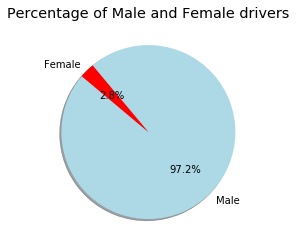

In [146]:
# Create a pie chart for genders
labels = 'Male', 'Female'
sizes = percent_count
colors = ["lightblue", "red"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Male and Female drivers")

#plt.savefig("../Images/percent_gender_pie_chart.png")
plt.show()

In [147]:
# Calculate the number of male and female drivers
trip_status = uber_df["trip_status"].value_counts()

# Calculate the percentage of male and female drivers
trip_percent_count = round((trip_status)/len(uber_df['trip_status'])*100,2)

# Create a summary table for genders
trip_table = pd.DataFrame({"Trip Status": trip_status, "Trip Percent":trip_percent_count})
trip_table

,Trip Status,Trip Percent
Completed,668,98.53
Cancelled,10,1.47


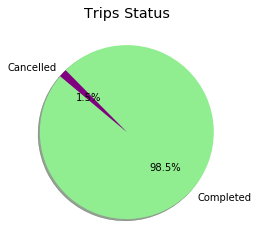

In [148]:
# Create a pie chart for genders
labels = 'Completed','Cancelled'
sizes = trip_percent_count
colors = ["lightgreen", "purple"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title("Trips Status")


plt.savefig("percent_status_pie_chart.png")
plt.show()

In [151]:
first_names1 = uber_df['city']
total_names1 = np.arange(len(uber_df['trip_status']))
popularity1 = uber_df['trip_status'] 

all_wait_df.plot(style='-', color =('tab:red', 'orange', 'tab:blue'))


plt.pie(total_names1, popularity1, align='center', alpha=0.5, color='green')
plt.xticks(total_names1, first_names1)
plt.ylabel('Popularity')
plt.xlabel('Drivers First Name')
plt.title("Most popular drivers' first name")
plt.xticks(rotation='vertical')

plt.show()

TypeError: pie() got an unexpected keyword argument 'align'

In [ ]:
all_wait_df = pd.DataFrame({"Maximum Wait": (wait_df_by_max), 
                          "Average Wait": (wait_df_mean), 
                            "Minimum Wait": (wait_df_by_min)})
pd.DataFrame(all_wait_df).head()


all_wait_df.plot(style='-', color =('tab:red', 'orange', 'tab:blue'))

plt.xlabel("Years (by month)")
plt.ylabel("Wait Time (in minutes)")
plt.legend(loc="best")
plt.title("Evolution of Waiting Time over the Years")
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()


In [116]:
trip_table['Trip Percent']

Completed    98.53
Cancelled     1.47
Name: Trip Percent, dtype: float64

The correlation between both factors is 1.0
The r-squared is: 1.0


FileNotFoundError: [Errno 2] No such file or directory: 'Images/tempdistancecorr.png'

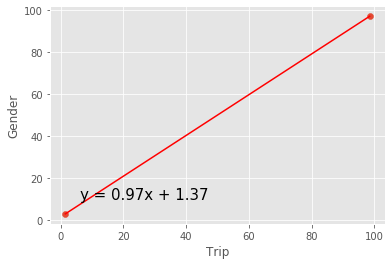

In [117]:
import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import scipy.stats as st
import datetime
from sklearn import datasets
from scipy.stats import linregress

x_values = trip_table['Trip Percent']
y_values = gender_table['Gender Percentage']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Trip')
plt.ylabel('Gender')
print(f"The r-squared is: {rvalue}")
plt.savefig('Images/tempdistancecorr.png')
plt.show()

# DRIVER FIRST NAME 'driver_name_en'

In [8]:
# Find drivers first name
drivers_names = pd.DataFrame(uber_df['driver_name_en'])

# Show duplicates first names
drivers_names = drivers_names.groupby(drivers_names.columns.tolist()).size()
names_df = pd.DataFrame(drivers_names).reset_index()

first_name = names_df['driver_name_en']
name_count = names_df[0]

# Show table with all the first names
names_table = pd.DataFrame({"First Name": first_name, "Name Count": name_count})
names_table.head()

,First Name,Name Count
0,Abbos,1
1,Abdula,1
2,Abdullo,1
3,Abuzar,1
4,Ahmad,1


In [9]:
uber_df['driver_name_en'].count()

678

In [10]:
# Create a table with the 15 most popular first names among Uber drivers 
top_names = names_table.nlargest(15,['Name Count']) 
top_names.head()

,First Name,Name Count
10,Aleksandr,54
143,Sergey,40
11,Aleksey,38
18,Andrey,37
51,Dmitriy,29


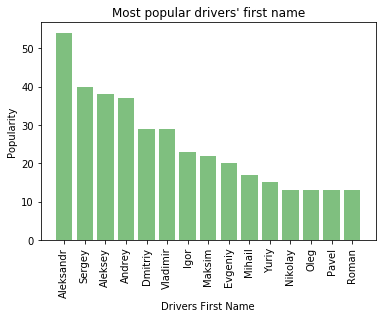

In [11]:
# Create a bar chart with the 15 most popular drivers first name
first_names1 = top_names['First Name']
total_names1 = np.arange(len(first_names1))
popularity1 = top_names['Name Count']

plt.bar(total_names1, popularity1, align='center', alpha=0.5, color='green')
plt.xticks(total_names1, first_names1)
plt.ylabel('Popularity')
plt.xlabel('Drivers First Name')
plt.title("Most popular drivers' first name")
plt.xticks(rotation='vertical')

plt.show()
#plt.savefig("../Images/popular_names_bar_chart.png")

In [32]:
uber_df.loc[uber_df.driver_name_en== 'Aleksandr', 'name_match'] = uber_df['city']
uber_df
uber_df.loc[uber_df.driver_name_en!= 'Aleksandr', 'name_match'] = []

drivers_names.groupby(uber_df.name_match.tolist()).size()




ValueError: Must have equal len keys and value when setting with an iterable

# WAIT TIME 'wait_time'

In [11]:
# Show wait time and convert to time format 
wait_df = uber_df['wait_time']
wait_df = pd.to_datetime(uber_df['wait_time'])
pd.DataFrame(wait_df).head()

,wait_time
0,2019-10-03 00:07:27
1,2019-10-03 00:06:33
2,2019-10-03 00:16:07
3,2019-10-03 00:06:23
4,2019-10-03 00:10:06


In [12]:
# Find all the trips dates 
start_df = uber_df['trip_start_time']
start_df = pd.to_datetime(start_df).reset_index()
start_df

trip_number = start_df['index']
trip_date = start_df['trip_start_time']

# Show table with all the trips and dates
trip_dates_df = pd.DataFrame({"Trip Number": trip_number, "Trip Date": trip_date})
trip_dates_df.head()

,Trip Number,Trip Date
0,0,2015-05-11 17:26:00
1,1,2015-05-11 18:46:00
2,2,2015-05-13 09:15:00
3,3,2015-05-16 00:24:00
4,4,2015-05-16 01:29:00


In [13]:
# Show the year and month for each trip 
trip_dates_df['Year'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.year))
trip_dates_df['Month'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.month))

new_trip_table = pd.DataFrame({"Trip Number": trip_number, 
                               "Trip Date": trip_date, 
                               "Month": (trip_dates_df['Month']), 
                               "Year": (trip_dates_df['Year']), 
                               "Wait Time by Minutes": (wait_df.dt.minute)})

new_trip_table.head()


,Trip Number,Trip Date,Month,Year,Wait Time by Minutes
0,0,2015-05-11 17:26:00,5,2015,7
1,1,2015-05-11 18:46:00,5,2015,6
2,2,2015-05-13 09:15:00,5,2015,16
3,3,2015-05-16 00:24:00,5,2015,6
4,4,2015-05-16 01:29:00,5,2015,10


In [14]:
# Find the average wait time per month
wait_df_mean = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].mean()
pd.DataFrame(wait_df_mean).head()

Wait Time by Minutes
Year Month                      
2015 10                 7.750000
     11                12.600000
     12                11.142857
     5                  9.333333
     6                 11.714286

In [15]:
# Find the maximum wait time per month
wait_df_by_max = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].max()
pd.DataFrame(wait_df_by_max).head()

Wait Time by Minutes
Year Month                      
2015 10                       17
     11                       17
     12                       21
     5                        17
     6                        45

In [16]:
# Find the minimum wait time per month
wait_df_by_min = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].min()
pd.DataFrame(wait_df_by_min).head()

Wait Time by Minutes
Year Month                      
2015 10                        4
     11                        6
     12                        6
     5                         3
     6                         1

In [17]:
all_wait_df = pd.DataFrame({"Maximum Wait": (wait_df_by_max), 
                          "Average Wait": (wait_df_mean), 
                            "Minimum Wait": (wait_df_by_min)})
pd.DataFrame(all_wait_df).head()

Maximum Wait  Average Wait  Minimum Wait
Year Month                                          
2015 10               17      7.750000             4
     11               17     12.600000             6
     12               21     11.142857             6
     5                17      9.333333             3
     6                45     11.714286             1

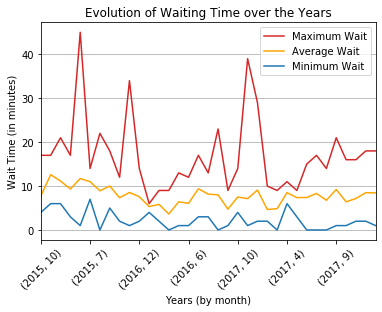

In [18]:
# Create a line graph showing the average, minimum and maximum wait time for each month
all_wait_df.plot(style='-', color =('tab:red', 'orange', 'tab:blue'))

plt.xlabel("Years (by month)")
plt.ylabel("Wait Time (in minutes)")
plt.legend(loc="best")
plt.title("Evolution of Waiting Time over the Years")
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()
#plt.savefig("../Images/wait_time_line_chart.png")

In [27]:
all_wait_df['Average Wait'].mean()

7.8522439426245

In [28]:
all_wait_df['Minimum Wait'].mean()

2.2

In [29]:
all_wait_df['Maximum Wait'].mean()

17.085714285714285

In [40]:
uber_df['wait_time'].max()

'02:18:23'

In [35]:
#Find the first trip date
first_trip = trip_dates_df['Trip Date'][trip_dates_df.index[0]]

# Find the last trip date
last_trip = trip_dates_df['Trip Date'][trip_dates_df.index[-1]]

print ("The first trip recorded was on:", first_trip, "and the last trip was on:", last_trip)

NameError: name 'trip_dates_df' is not defined

In [72]:
# Find percentage of wait time in total trip time 

ride_duration = uber_df['trip_time']
ride_duration = pd.to_datetime(ride_duration)

wait_duration = uber_df['wait_time']
wait_duration = pd.to_datetime(wait_duration)



percent_wait_of_total = (((wait_duration.dt.minute)*100) / ride_duration.dt.minute)
percent_wait_of_total

percent_wait_of_total[0]

ValueError: ('Unknown string format:', 'wait_time')

In [57]:
#ride_duration = pd.to_datetime(ride_duration)
ride_duration.dtypes
#avg_ride_duration = pd.to_datetime.ride_duration.mean()


#start_df = pd.to_datetime(start_df).reset_index()

dtype('<M8[ns]')

In [51]:


labels = 'ride_duration', 'wait_duration'
sizes = 'percent_wait_of_total'
colors = ["lightblue", "red"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Male and Female drivers")

#plt.savefig("../Images/percent_gender_pie_chart.png")
plt.show()


TypeError: DatetimeIndex cannot perform the operation mean

In [ ]:
x_values = uber_df['wait_time']
y_values = uber_df['city']




In [71]:
import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import scipy.stats as st
import datetime
from sklearn import datasets
from scipy.stats import linregress

x_values = uber_df['wait_time']
y_values = uber_df['city']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Wait time')
plt.ylabel('City')
print(f"The r-squared is: {rvalue}")
#plt.savefig('Images/distanceprice.png')
plt.show()


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [152]:
import pandas
uber_df
uber_df.loc[uber_df.city == "Saint Petersburg", uber_df['wait_time'].mean()] = "wait_time"
uber_df


#ubeuber_dfr_df.loc[uber_df.ID == 103, 'LastName'] = "Jones"



TypeError: Could not convert 2:18:232:11:201:08:28wait_timewait_timewait_timewait_time0:24:21wait_time0:22:00wait_timewait_timewait_timewait_time0:19:31wait_timewait_timewait_timewait_timewait_timewait_time0:17:42wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:15:37wait_time0:15:29wait_time0:15:23wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:13:47wait_timewait_timewait_timewait_timewait_timewait_time0:13:33wait_timewait_timewait_timewait_time0:13:21wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:12:41wait_timewait_time0:12:32wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:11:58wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:11:35wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:11:18wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:10:36wait_timewait_time0:10:32wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:10:21wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:09:30wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:09:15wait_timewait_timewait_time0:09:07wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:08:18wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:08:07wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:07:43wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:07:33wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:06:45wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:06:36wait_timewait_timewait_timewait_timewait_timewait_timewait_time0:06:29wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:06:19wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:06:02wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:04:08wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:03:54wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:03:28wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:02:56wait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_timewait_time0:00:25 to numeric

In [63]:
#df.apply(lambda row: row.a + row.b, axis=1) 

uber_df.apply(lambda: uber_df['city'] + uber_df['city']>5, axis=0) #.apply(lambda line:  str(line.year))
#trip_dates_df['Month'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.month))

TypeError: ('<lambda>() takes 0 positional arguments but 1 was given', 'occurred at index trip_completed_at')

In [21]:
#### 4) START TIME 'trip_start_time' not sure #####

In [22]:
percent_wait = 

SyntaxError: invalid syntax (<ipython-input-22-2e81c37cfd13>, line 1)

In [25]:
# Find time of the day the trip started 'trip_start_time'
#start_time = uber_df['trip_start_time']


start_time_lst = uber_df['trip_start_time'].len()
start_time_lst

# Find average time of the day 'trip_start_time'
#avg_start = start_time_lst.mean()
#avg_start

# Find correlation between time of the day and gender 'trip_start_time'

AttributeError: 'Series' object has no attribute 'len'

In [89]:
# Find number of cancelled trips 'trip_status' 
status_trip = uber_df['trip_status']
status_trip


status_trip_df = pd.DataFrame(status_trip).reset_index()
status_trip_df

#df = pd.DataFrame({"Years": years, "Wait time": wait_df })
#df = pd.to_datetime(df)

cancel = status_trip_df.groupby(status_trip == 'Cancelled').count()
cancel

trip_complete = cancel == 'False'
trip_complete
trip_cancelled = cancel == 'True'
trip_cancelled

#status_df = pd.DataFrame({"Complete": (trip_complete), 
#                          "Cancelled": (trip_cancelled)}, index=["Complete"])

status_df = pd.concat([trip_complete, trip_cancelled], axis=1)
status_df
#cancel_trip = status_trip == 'Cancelled'
#nb_cancel_trip = cancel_trip.count()

#status_trip = pd.DataFrame({'Cancelled':list('status_trip')})
#status_trip.groupby('Cancelled').count()
#uber_df['trip_status'].groupby('Cancelled').count()

# Find number of completed rides 'trip_status' 
#completed_trip = status_trip == 'Completed'
#completed_trip.count()

# Find correlation between ride status and time of the day 'trip_status' 

,index,trip_status,index,trip_status
trip_status,,,,
False,False,False,False,False
True,False,False,False,False


In [24]:
# Find ride durations (only riding) 'trip_time'




#avg_duration = ride_duration.mean()
#avg_duration

# Find average ride durations ''trip_time'

#print ("The average duration time of a trip is:", avg_duration)


0     2019-10-02 00:21:33
1     2019-10-02 00:19:27
2     2019-10-02 01:06:53
3     2019-10-02 00:13:37
4     2019-10-02 00:38:54
5     2019-10-02 00:16:38
6     2019-10-02 00:40:24
7     2019-10-02 00:41:56
8     2019-10-02 00:10:06
9     2019-10-02 00:25:30
10    2019-10-02 00:17:47
11    2019-10-02 00:14:28
12    2019-10-02 00:15:19
13    2019-10-02 00:50:13
14    2019-10-02 00:12:39
15    2019-10-02 00:16:18
16    2019-10-02 00:11:27
17    2019-10-02 00:16:39
18    2019-10-02 00:16:28
19    2019-10-02 00:14:13
20    2019-10-02 00:21:12
21    2019-10-02 00:01:00
22    2019-10-02 00:45:40
23    2019-10-02 00:30:44
24    2019-10-02 00:25:18
25    2019-10-02 00:30:18
26    2019-10-02 00:09:33
27    2019-10-02 00:22:31
28    2019-10-02 00:45:00
29    2019-10-02 01:08:04
              ...        
648   2019-10-02 00:21:35
649   2019-10-02 00:19:54
650   2019-10-02 00:17:57
651   2019-10-02 00:19:12
652   2019-10-02 00:23:49
653   2019-10-02 00:14:42
654   2019-10-02 00:13:13
655   2019-1

In [ ]:
# Find the percentage of wait in each trip total duration 'wait_time' 'total_time'

# Find the average percentage of wait time in total duration 'wait_time' 'total_time'

# Find correlation between wait time percentage and gender ''wait_time' total_time'

In [ ]:
# Find how often a trip was booked during surge hours

# Find correlation between time of the day the trip started and surge mulitplier 'trip_start_time' 'surge_multiplier'

In [ ]:
#correlation between total trip time and waiting time 

In [ ]:
# Calculate the sum of all the waiting times over the years 
sum_wait = wait_df.sum()

print ("The sum of all the waiting times over the years is:", sum_wait)

In [ ]:
# Calculate average wait time
avg_wait = wait_df.mean()
avg_wait = avg_wait
      
print ("The average waiting time is:", avg_wait)
